In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [195]:
df = pd.read_csv('D:/data_te.csv')

In [196]:
df.head()

,Order Id,Date Added,Ref No,Product Id,HSN,Product Name,Order Options,Price,Quantity,Total Excl Tax,...,Customer GST Number,Supply Type,Tax Rate,CGST,SGST,IGST,single_product_weight_in_gm,order_weight_in_gm,Product Type,Courier Partner
0,346206500223,31-01-2022,867326,5286,11041200,6Uec10Iqqt,fg int-pune: 22TE025,402.29,1,402.29,...,29AAGCT4620E1ZF,B2B,GST 5,0,0,20.1143,1200,1200,FG,Delhivery
1,346206500222,31-01-2022,867585,lvHA,19012000,sZRvN7lEWB,fg int-pune: 22TE006,111.12,1,111.12,...,29AAGCT4620E1ZF,B2B,GST 18,0,0,20.0014,250,250,FG,Delhivery
2,346206500221,31-01-2022,868982,r71S,19041090,sWrJ3DdrB6,fg int-pune: 22TE029,145.42,1,145.42,...,29AAGCT4620E1ZF,B2B,GST 18,0,0,26.1763,325,1325,FG,Delhivery
3,346206500221,31-01-2022,868982,iljG,19041090,2oTsIxCuIz,fg int-pune: 22TE029,443.73,1,443.73,...,29AAGCT4620E1ZF,B2B,GST 18,0,0,79.8712,1000,1325,FG,Delhivery
4,346206500220,31-01-2022,871315,MMNL,21061000,azKG9uogCd,fg int-pune: 22TE021,145.42,1,145.42,...,29AAGCT4620E1ZF,B2B,GST 18,0,0,26.1763,350,350,FG,Delhivery


In [197]:
df.shape

(149, 29)

In [198]:
# 148 rows with 29 columns

In [199]:
df.columns.values

array(['Order Id', 'Date Added', 'Ref No', 'Product Id', 'HSN',
       'Product Name', 'Order Options', 'Price', 'Quantity',
       'Total Excl Tax', 'Product Tax', 'Total Incl Tax', 'Sub Total',
       'Shipping', 'Total Tax', 'Order Total', 'Order Status',
       'Tracking Id', 'Date Shipped', 'Customer GST Number',
       'Supply Type', 'Tax Rate', 'CGST', 'SGST', 'IGST',
       'single_product_weight_in_gm', 'order_weight_in_gm',
       'Product Type', 'Courier Partner'], dtype=object)

In [200]:
df.dtypes

Order Id                         int64
Date Added                      object
Ref No                           int64
Product Id                      object
HSN                              int64
Product Name                    object
Order Options                   object
Price                          float64
Quantity                         int64
Total Excl Tax                 float64
Product Tax                    float64
Total Incl Tax                 float64
Sub Total                      float64
Shipping                       float64
Total Tax                      float64
Order Total                    float64
Order Status                    object
Tracking Id                      int64
Date Shipped                    object
Customer GST Number             object
Supply Type                     object
Tax Rate                        object
CGST                             int64
SGST                             int64
IGST                           float64
single_product_weight_in_

In [201]:
df.describe()

,Order Id,Ref No,HSN,Price,Quantity,Total Excl Tax,Product Tax,Total Incl Tax,Sub Total,Shipping,Total Tax,Order Total,Tracking Id,CGST,SGST,IGST,single_product_weight_in_gm,order_weight_in_gm
count,1.490000e+02,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.00000,0.0,149.000000,149.00000,1.490000e+02,149.0,149.0,149.000000,149.000000,149.000000
mean,3.462065e+11,938271.436242,1.701997e+07,230.135436,1.154362,251.914362,32.278389,284.192752,348.14302,NaN,43.681409,391.82443,2.883811e+12,0.0,0.0,32.278387,448.993289,692.583893
std,3.543084e+01,19521.095864,4.985719e+06,125.685249,0.475406,129.246314,23.358000,147.874107,148.34535,NaN,24.232642,166.20841,1.371584e+04,0.0,0.0,23.358161,312.704517,436.792132
min,3.462065e+11,867326.000000,4.090000e+02,73.830000,1.000000,73.830000,5.240000,87.120000,104.76000,NaN,5.240000,110.00000,2.883811e+12,0.0,0.0,5.238100,120.000000,120.000000
25%,3.462065e+11,931579.000000,1.207999e+07,124.880000,1.000000,145.420000,14.050000,171.600000,220.00000,NaN,20.950000,259.60000,2.883811e+12,0.0,0.0,14.048600,140.000000,400.000000
50%,3.462065e+11,941737.000000,1.904109e+07,167.620000,1.000000,220.000000,26.180000,259.600000,383.43000,NaN,43.170000,431.20000,2.883811e+12,0.0,0.0,26.176300,390.000000,600.000000
75%,3.462065e+11,951258.000000,2.008192e+07,294.640000,1.000000,392.070000,39.600000,422.400000,444.47000,NaN,55.910000,523.60000,2.883811e+12,0.0,0.0,39.600000,500.000000,1000.000000
max,3.462065e+11,959792.000000,2.106910e+07,510.710000,4.000000,510.710000,80.010000,572.000000,699.55000,NaN,106.050000,742.72000,2.883811e+12,0.0,0.0,80.005600,1200.000000,2700.000000


In [202]:
# Describe is used inly for numerical data beacuse mean and all other statistical parameters are not possible for object data

In [203]:
# Now as we can see there is no entery in shipping we can actually drop that column

In [204]:
df = df.drop('Shipping',1)

<ipython-input-204-22a5e9e9e3fc>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Shipping',1)


In [205]:
df.head()

,Order Id,Date Added,Ref No,Product Id,HSN,Product Name,Order Options,Price,Quantity,Total Excl Tax,...,Customer GST Number,Supply Type,Tax Rate,CGST,SGST,IGST,single_product_weight_in_gm,order_weight_in_gm,Product Type,Courier Partner
0,346206500223,31-01-2022,867326,5286,11041200,6Uec10Iqqt,fg int-pune: 22TE025,402.29,1,402.29,...,29AAGCT4620E1ZF,B2B,GST 5,0,0,20.1143,1200,1200,FG,Delhivery
1,346206500222,31-01-2022,867585,lvHA,19012000,sZRvN7lEWB,fg int-pune: 22TE006,111.12,1,111.12,...,29AAGCT4620E1ZF,B2B,GST 18,0,0,20.0014,250,250,FG,Delhivery
2,346206500221,31-01-2022,868982,r71S,19041090,sWrJ3DdrB6,fg int-pune: 22TE029,145.42,1,145.42,...,29AAGCT4620E1ZF,B2B,GST 18,0,0,26.1763,325,1325,FG,Delhivery
3,346206500221,31-01-2022,868982,iljG,19041090,2oTsIxCuIz,fg int-pune: 22TE029,443.73,1,443.73,...,29AAGCT4620E1ZF,B2B,GST 18,0,0,79.8712,1000,1325,FG,Delhivery
4,346206500220,31-01-2022,871315,MMNL,21061000,azKG9uogCd,fg int-pune: 22TE021,145.42,1,145.42,...,29AAGCT4620E1ZF,B2B,GST 18,0,0,26.1763,350,350,FG,Delhivery


In [206]:
df.columns.values

array(['Order Id', 'Date Added', 'Ref No', 'Product Id', 'HSN',
       'Product Name', 'Order Options', 'Price', 'Quantity',
       'Total Excl Tax', 'Product Tax', 'Total Incl Tax', 'Sub Total',
       'Total Tax', 'Order Total', 'Order Status', 'Tracking Id',
       'Date Shipped', 'Customer GST Number', 'Supply Type', 'Tax Rate',
       'CGST', 'SGST', 'IGST', 'single_product_weight_in_gm',
       'order_weight_in_gm', 'Product Type', 'Courier Partner'],
      dtype=object)

In [207]:
from datetime import datetime

In [208]:
df['Date Added'] = pd.to_datetime(df['Date Added'], errors='coerce')
df['Date Added'] = pd.to_datetime(df['Date Shipped'], errors='coerce')
df['Product Name'] = df['Product Name'].astype(str)
df['Quantity'] = df['Quantity'].astype(int)
df['Price'] = df['Price'].astype(float)

In [209]:
df.head()

,Order Id,Date Added,Ref No,Product Id,HSN,Product Name,Order Options,Price,Quantity,Total Excl Tax,...,Customer GST Number,Supply Type,Tax Rate,CGST,SGST,IGST,single_product_weight_in_gm,order_weight_in_gm,Product Type,Courier Partner
0,346206500223,2022-01-31,867326,5286,11041200,6Uec10Iqqt,fg int-pune: 22TE025,402.29,1,402.29,...,29AAGCT4620E1ZF,B2B,GST 5,0,0,20.1143,1200,1200,FG,Delhivery
1,346206500222,2022-01-31,867585,lvHA,19012000,sZRvN7lEWB,fg int-pune: 22TE006,111.12,1,111.12,...,29AAGCT4620E1ZF,B2B,GST 18,0,0,20.0014,250,250,FG,Delhivery
2,346206500221,2022-01-31,868982,r71S,19041090,sWrJ3DdrB6,fg int-pune: 22TE029,145.42,1,145.42,...,29AAGCT4620E1ZF,B2B,GST 18,0,0,26.1763,325,1325,FG,Delhivery
3,346206500221,2022-01-31,868982,iljG,19041090,2oTsIxCuIz,fg int-pune: 22TE029,443.73,1,443.73,...,29AAGCT4620E1ZF,B2B,GST 18,0,0,79.8712,1000,1325,FG,Delhivery
4,346206500220,2022-01-31,871315,MMNL,21061000,azKG9uogCd,fg int-pune: 22TE021,145.42,1,145.42,...,29AAGCT4620E1ZF,B2B,GST 18,0,0,26.1763,350,350,FG,Delhivery


In [210]:
items = df.groupby('Product Id').agg({'Quantity' : 'sum', 'Order Total' : 'mean', 'order_weight_in_gm' : 'sum'})
items

,Quantity,Order Total,order_weight_in_gm
Product Id,,,
0,3,451.146667,2140
0lKj,1,131.120000,125
2IBb,1,330.000000,125
2r8x,1,131.120000,125
4XB1,6,326.480000,2190
...,...,...,...
xMfA,4,491.333333,2275
xeVd,1,416.240000,650
y4hg,3,131.120000,375


In [211]:
df['Product Name']

0      6Uec10Iqqt
1      sZRvN7lEWB
2      sWrJ3DdrB6
3      2oTsIxCuIz
4      azKG9uogCd
          ...    
144    RkaFDwCzQd
145    a3iNLtDYsp
146    8hyj8aaEuy
147    6ii6cvL07i
148    pMEv9tn9Sf
Name: Product Name, Length: 149, dtype: object

In [212]:
# so we are having a total of 148 rows associated with product Name but product Id for rows cn be repeated

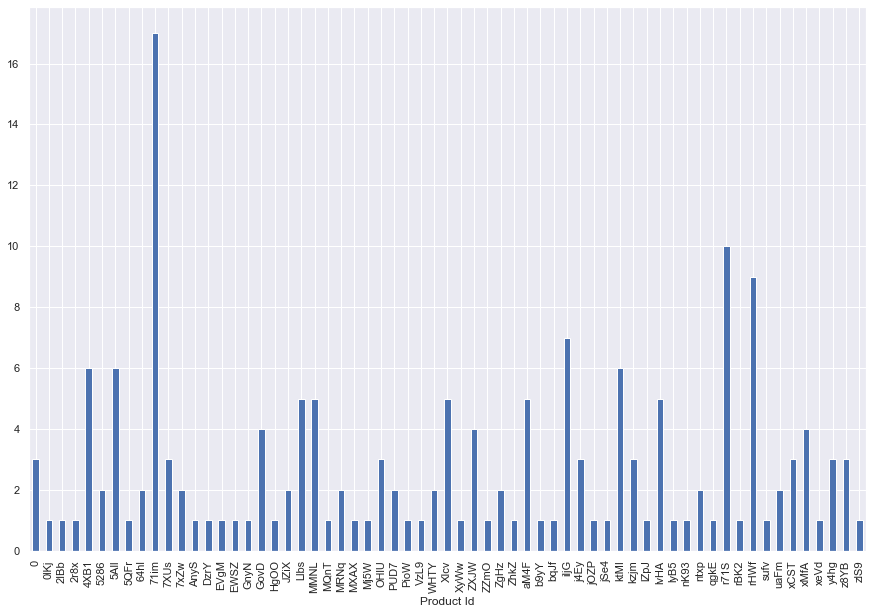

In [213]:
max = items['Quantity'].plot.bar(figsize = (15,10))

In [214]:
# so from here we can observe that maximum amount of sales are for 71im, r71S,rHWf.

In [215]:
# so now for obtaining Insights from data there should be variation in the data but few columns like Courier Partner,Producttype
# Cgst, Sgst ,Supply type , Customer Gst Number , Date Shipped , Order Status, order options , Date added are having constant
# values across all the available rows so for the time being we can drop all these columns to process data in much more precise
# manner

In [216]:
df = df.drop(columns=['Date Added', 'Order Options', 'Order Status', 'Date Shipped', 'Customer GST Number','Supply Type','CGST','SGST','Product Type','Courier Partner'])

In [217]:
df.head()

,Order Id,Ref No,Product Id,HSN,Product Name,Price,Quantity,Total Excl Tax,Product Tax,Total Incl Tax,Sub Total,Total Tax,Order Total,Tracking Id,Tax Rate,IGST,single_product_weight_in_gm,order_weight_in_gm
0,346206500223,867326,5286,11041200,6Uec10Iqqt,402.29,1,402.29,20.11,422.40,402.29,20.11,422.40,2883811394886,GST 5,20.1143,1200,1200
1,346206500222,867585,lvHA,19012000,sZRvN7lEWB,111.12,1,111.12,20.00,131.12,111.12,20.00,131.12,2883811392355,GST 18,20.0014,250,250
2,346206500221,868982,r71S,19041090,sWrJ3DdrB6,145.42,1,145.42,26.18,171.60,589.15,106.05,695.20,2883811408175,GST 18,26.1763,325,1325
3,346206500221,868982,iljG,19041090,2oTsIxCuIz,443.73,1,443.73,79.87,523.60,589.15,106.05,695.20,2883811408175,GST 18,79.8712,1000,1325
4,346206500220,871315,MMNL,21061000,azKG9uogCd,145.42,1,145.42,26.18,171.60,145.42,26.18,171.60,2883811375990,GST 18,26.1763,350,350


In [218]:
# Now we need to perform some analysis with tax that if my Total Price gets Increased what is the behaviour of Tax and so on..... 

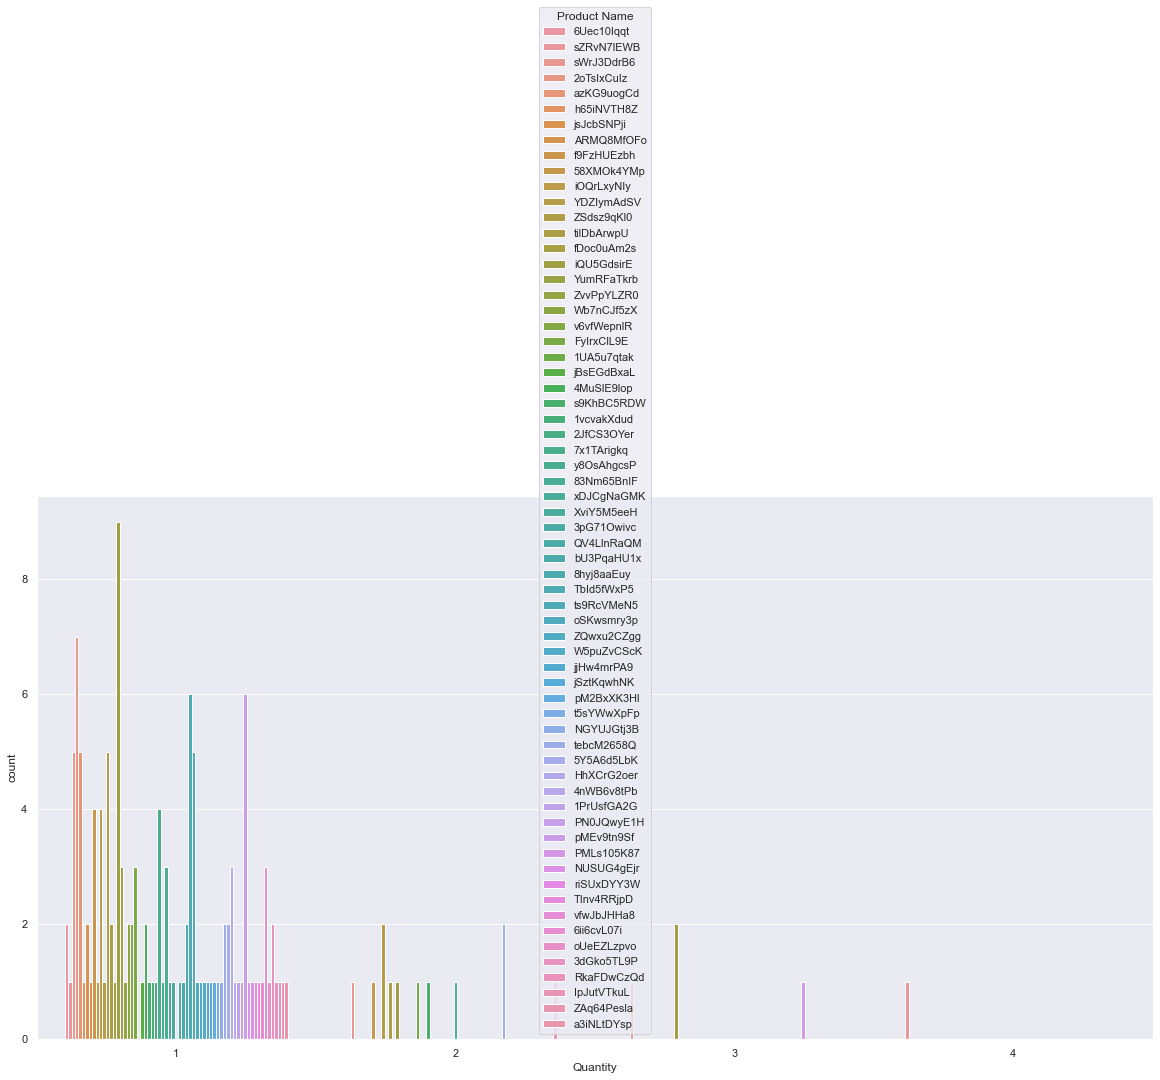

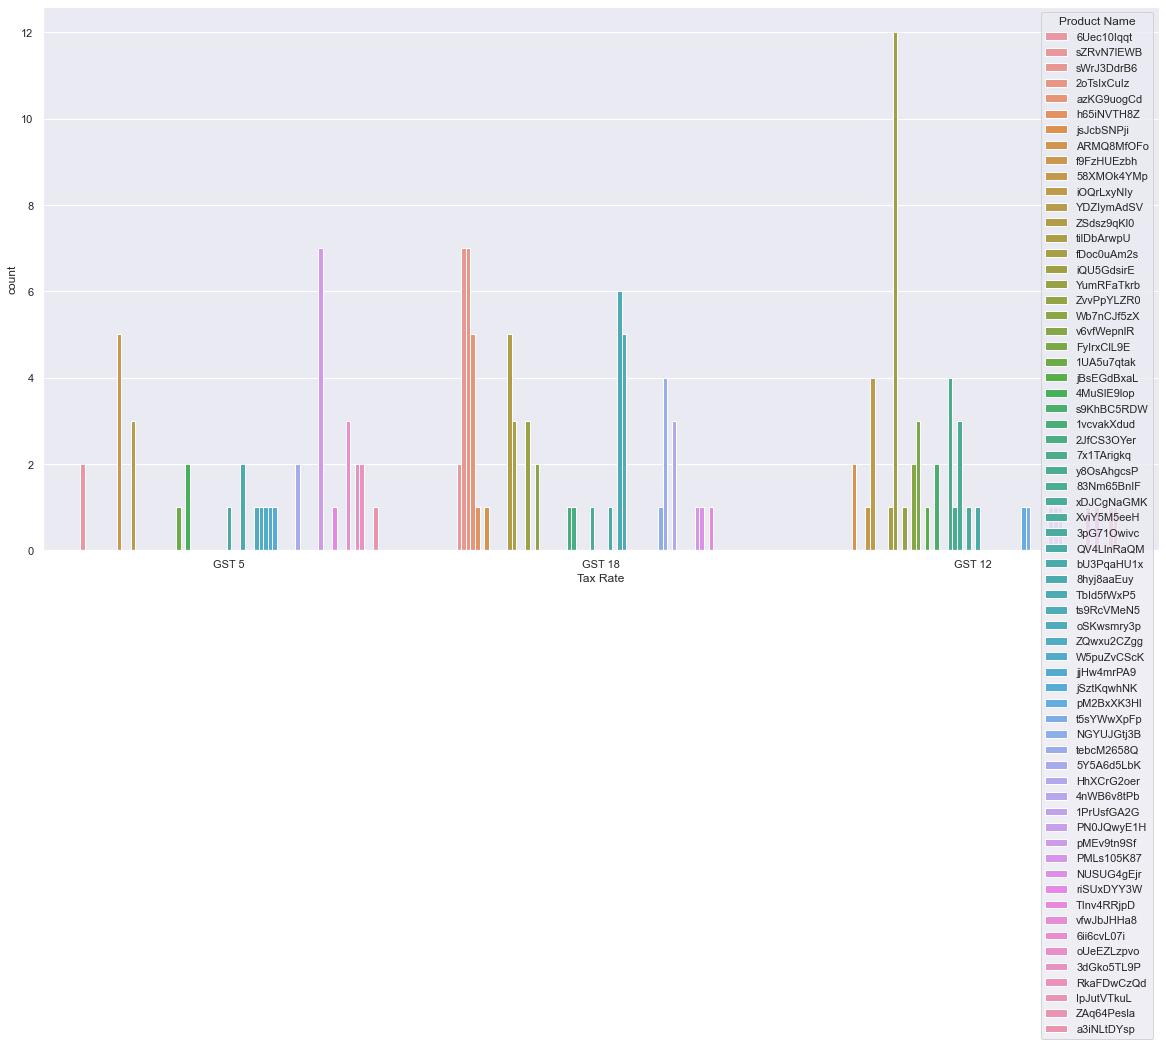

In [219]:
sns.set(rc = {'figure.figsize':(20,10)})
for i, predictor in enumerate(df.drop(columns=['Order Id','Product Tax','Total Tax','Order Total','IGST','single_product_weight_in_gm','Ref No','Product Id','HSN','Price','Total Excl Tax','Total Incl Tax','Sub Total','Tracking Id','Product Name','order_weight_in_gm'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Product Name')
    

In [220]:
# so from this data we are able to understand the general spread of product quantities sold.

In [221]:
# we are also able to infer from data that product with count =12 is having a maximum GST 12, whereas product with count 7 is 
# having maximum gst 18 wheras product with count 7 is also having a maximum GST 5.
# we can aslo see what product it is by looking at the legend chart

In [222]:
# Analyzing the data by order value

array([[<AxesSubplot:title={'center':'Order Total'}>]], dtype=object)

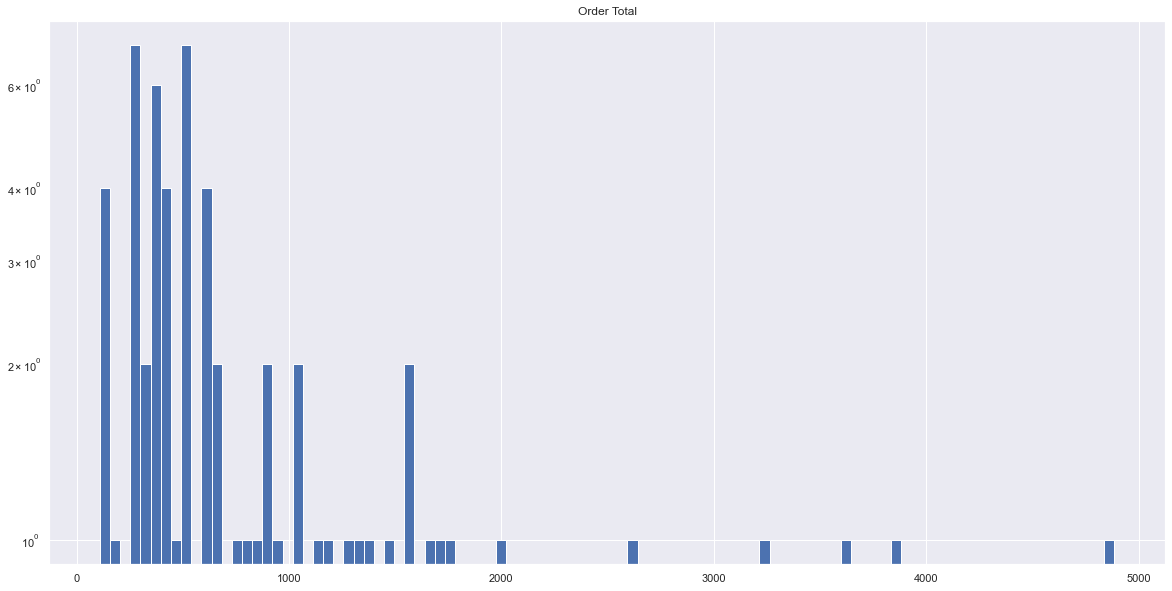

In [223]:
orders = df.groupby(['Product Id']).agg({'Order Total':'sum'}).sort_values('Order Total').reset_index()
orders.hist(bins=100, log=True)

In [224]:
orders['Order Total'].describe()

count      63.000000
mean      926.695873
std       951.536787
min       110.000000
25%       352.000000
50%       528.000000
75%      1156.320000
max      4886.640000
Name: Order Total, dtype: float64

In [225]:
# so from this distibution we are able to understand that maximum sales are for order with less amount, whereas there are 
# minimal sales for order with higher amount.

In [226]:
# Now we need to understand co-relation between different vaiables so for that we will consider Important parameters
# associated with total order value of a product

In [235]:
# using label encoding on the product name coloumn we can convert product name into an column with numerical entities for
# further processing.

In [236]:
df['Product Name']

0      11
1      56
2      55
3       4
4      38
       ..
144    25
145    37
146    15
147    12
148    52
Name: Product Name, Length: 149, dtype: int32

In [227]:
label_encoder = preprocessing.LabelEncoder()

In [228]:
df['Product Name']= label_encoder.fit_transform(df['Product Name'])

In [229]:
df.head()

,Order Id,Ref No,Product Id,HSN,Product Name,Price,Quantity,Total Excl Tax,Product Tax,Total Incl Tax,Sub Total,Total Tax,Order Total,Tracking Id,Tax Rate,IGST,single_product_weight_in_gm,order_weight_in_gm
0,346206500223,867326,5286,11041200,11,402.29,1,402.29,20.11,422.40,402.29,20.11,422.40,2883811394886,GST 5,20.1143,1200,1200
1,346206500222,867585,lvHA,19012000,56,111.12,1,111.12,20.00,131.12,111.12,20.00,131.12,2883811392355,GST 18,20.0014,250,250
2,346206500221,868982,r71S,19041090,55,145.42,1,145.42,26.18,171.60,589.15,106.05,695.20,2883811408175,GST 18,26.1763,325,1325
3,346206500221,868982,iljG,19041090,4,443.73,1,443.73,79.87,523.60,589.15,106.05,695.20,2883811408175,GST 18,79.8712,1000,1325
4,346206500220,871315,MMNL,21061000,38,145.42,1,145.42,26.18,171.60,145.42,26.18,171.60,2883811375990,GST 18,26.1763,350,350


In [230]:
df = df.drop(columns=['Order Id', 'Ref No', 'Product Id', 'HSN', 'Tracking Id','Tax Rate'])

<AxesSubplot:>

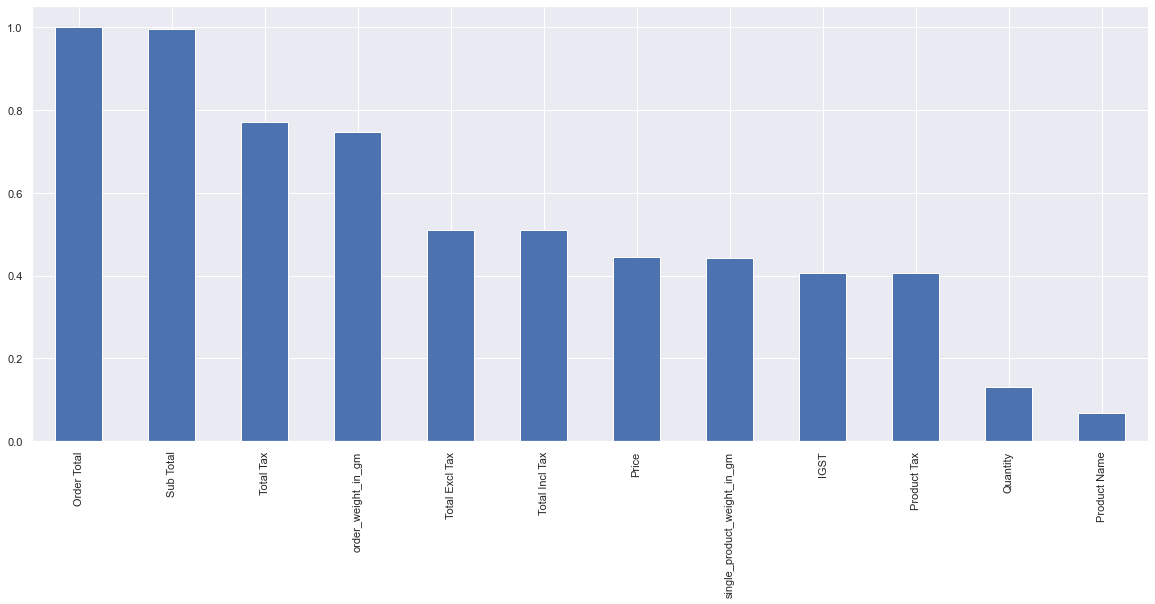

In [231]:
plt.figure(figsize=(20,8))
df.corr()['Order Total'].sort_values(ascending = False).plot(kind = 'bar')

In [233]:
# so from this plot we can understand that all the numericals are having atleast a positive co-relation with the order total
# value. One thing we can note here is that Sub total, total tax , order_weight_in_gm are having a strong positive co-relation 
# with the Order Total (That is our output variable with which we are concerned). Where as Quantity and Product name are not
# affecting to the Order total that much. So one thing to note over here can be that the name of the Product is not affecting 
# the Order Total.

<AxesSubplot:>

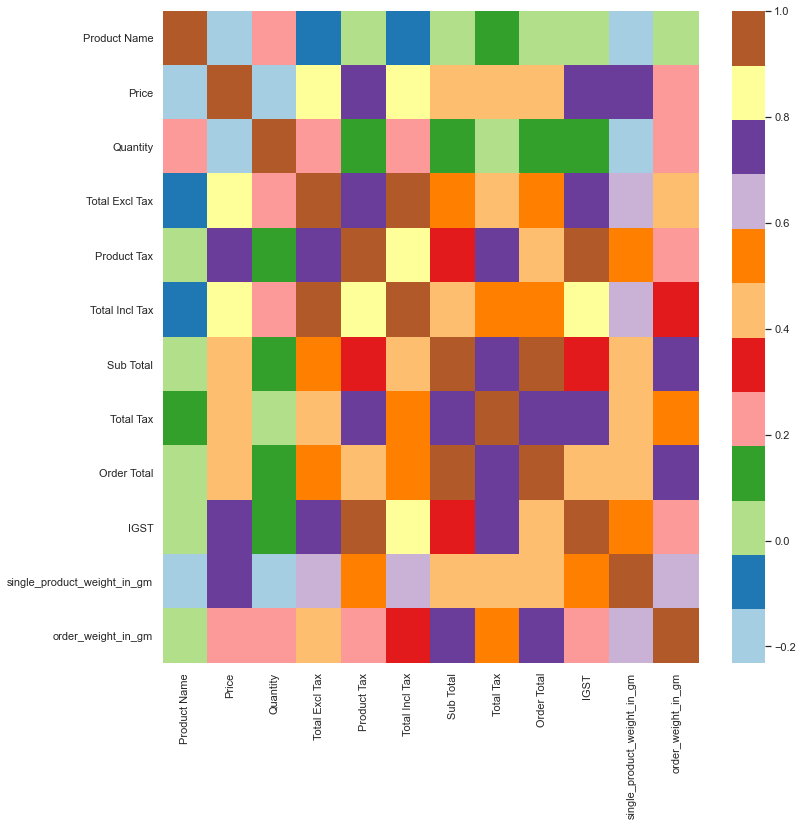

In [234]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Paired")

In [239]:
# so now we can observe a corelation map wher we can clearly see which variables are highly correlated to each other by
# observing brown and light yellow blocks and we can actually see what parameters are not co-related at all or having 0 correlation
# by observing light green and dark green squares and light blue and dark blue for negative co-relation.
# Few of the high corelation are:- 
# 1.) Product Tax and Igst
# 2.) Sub Total and Order Total
# Few of the low corelation are:-
# 1.) Single_product_weight_in_gm and Product Name
# 2.) Quantity and Single_product_weight_in_gm

In [ ]:
# Now Bi-variate Analysis will not make any sense here because we are not having any binary classification output variable
# in the given data. So Now this is the general Analysis and few Insights we have obtained from the given Raw Data.